# Лабораторная работа №1
> Выполнили:  
> – 339080, Дьячихин Данила Никитич  
> – 368606, Овчинников Павел Алексеевич

**Цель работы:** научиться применять инструменты для подготовки данных.

Для начала импортируем необходимые модули в Python и загрузим датасеты `Advertising` и `heart`.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import heatmap, pairplot
from sklearn.preprocessing import StandardScaler
from statsmodels.distributions.empirical_distribution import ECDF

advertising = pd.read_csv('Advertising.csv')
heart = pd.read_csv('heart.csv')
print(advertising.info())
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  

Датасеты загружены, нулевых значений в датасете нет, поэтому можем приступать к выполнению задания.

## Датасет `Advertising`

### Первичный статистический анализ данных
Вычислим меры центральной тенденции, т.е. выборочное среднее, медиану и моду.

In [3]:
mean_values = advertising.mean()
median_values = advertising.median()
mode_values = advertising.mode().iloc[0]

print('Выборочное среднее:\n', mean_values)
print('\nМедиана:\n', median_values)
print('\nМода:\n', mode_values)

Выборочное среднее:
 TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

Медиана:
 TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64

Мода:
 TV           17.2
radio         4.1
newspaper     8.7
sales         9.7
Name: 0, dtype: float64


Теперь вычислим меры разброса, т.е. дисперсию, СКО, min/max значения (в т.ч. размах) и IQR (в т.ч. квартили).

In [4]:
variance = advertising.var()
std_dev = advertising.std()

min_ = advertising.min()
max_ = advertising.max()
min_max_ = zip(min_, max_)
range_ = max_ - min_

q1 = advertising.quantile(0.25)
q3 = advertising.quantile(0.75)
iqr = q3 - q1

for i, (name, value) in enumerate(
    zip(
        ['Дисперсия:', 'СКО:', 'Min/max:', 'Размах:', '1-й квартиль:', '3-й квартиль:', 'IQR:'],
        [variance, std_dev, min_max_, range_, q1, q3, iqr],
    )
):
    print('\n' * bool(i), name, sep='')
    if name == 'Min/max:':
        for col, (min_val, max_val) in zip(advertising.columns, value):
            print(f'{col:<13}{min_val} / {max_val}')
        continue
    print(value)

Дисперсия:
TV           7370.949893
radio         220.427743
newspaper     474.308326
sales          27.221853
dtype: float64

СКО:
TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64

Min/max:
TV           0.7 / 296.4
radio        0.0 / 49.6
newspaper    0.3 / 114.0
sales        1.6 / 27.0

Размах:
TV           295.7
radio         49.6
newspaper    113.7
sales         25.4
dtype: float64

1-й квартиль:
TV           74.375
radio         9.975
newspaper    12.750
sales        10.375
Name: 0.25, dtype: float64

3-й квартиль:
TV           218.825
radio         36.525
newspaper     45.100
sales         17.400
Name: 0.75, dtype: float64

IQR:
TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64


Имея меры выше, мы уже можем сделать некоторые выводы:
- Затраты на рекламу в газетах варьируются от 0.3 до 114, но при этом выборочное среднее и медиана сосредоточены в районе 25-30, что говорит о большом разбросе данных — здесь точно потребуется нормализация.
- Затраты на рекламу по ТВ гораздо выше, чем в газетах и по радио, что видно по выборочному среднему и медиане.


Вычислим параметры формы распределений каждого признака, т.е. коэффициенты асимметрии и эксцесса.

In [5]:
skew = advertising.skew()
kurt = advertising.kurt()

for i, (name, value) in enumerate(zip(['Асимметрия:', 'Эксцесс:'], [skew, kurt])):
    print('\n' * bool(i), name, sep='')
    print(value)

Асимметрия:
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Эксцесс:
TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64


Первый наш вывод подтверждается коэффициентом асимметрии, который для газет положительный — это свидетельствует о том, что распределение скошено влево и большая часть значений именно в районе выборочного среднего.

Сделаем ещё несколько выводов:
- Для ТВ и радио коэффициент асимметрии близок к 0, что говорит о том, что выборочное среднее находится по центру распределения.
- Для ТВ и радио коэффициент эксцесса меньше 0, что говорит о том, что распределение плоское и не имеет тяжёлых хвостов.

Подтвердим наши догадки с помощью графиков. Построим гистограммы для каждого признака, ECDF (эмпирическая функция распределения), KDE (ядерная оценка плотности) и pairplot.

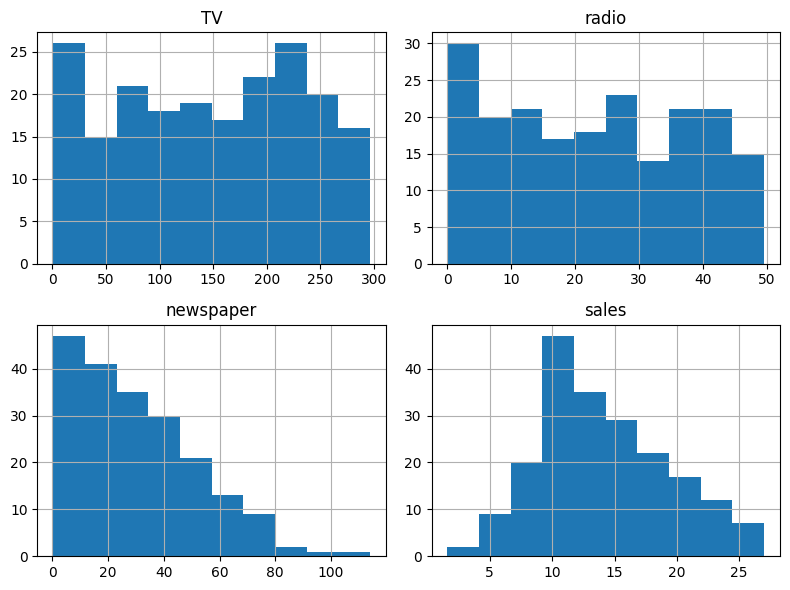

In [6]:
# Гистограммы

num_bins = 10

plt.figure(figsize=(8, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.grid()
    plt.hist(advertising.iloc[:, i], bins=num_bins)
    plt.title(advertising.columns[i])

plt.tight_layout()
plt.show()

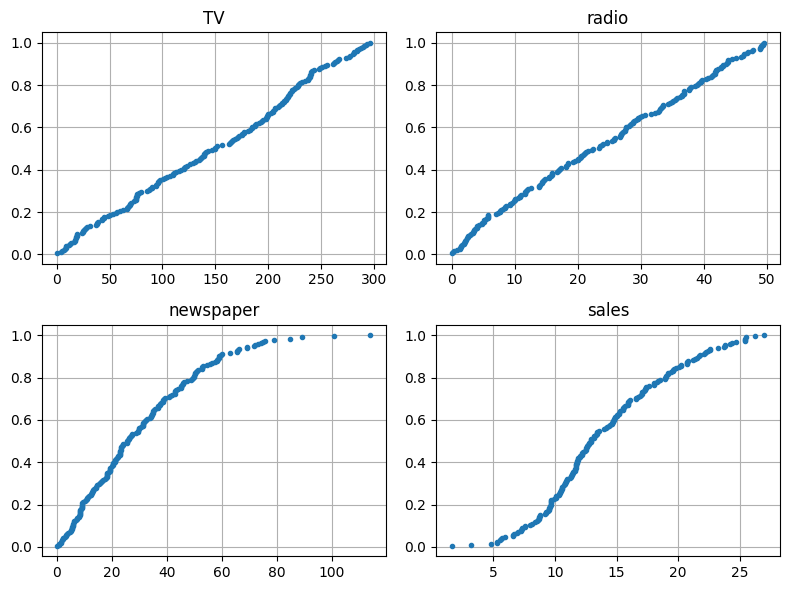

In [7]:
# ECDF

plt.figure(figsize=(8, 6))
for i, column in enumerate(advertising.columns):
    plt.subplot(2, 2, i + 1)
    ecdf = ECDF(advertising[column])
    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none')
    plt.title(column)
    plt.grid()

plt.tight_layout()
plt.show()

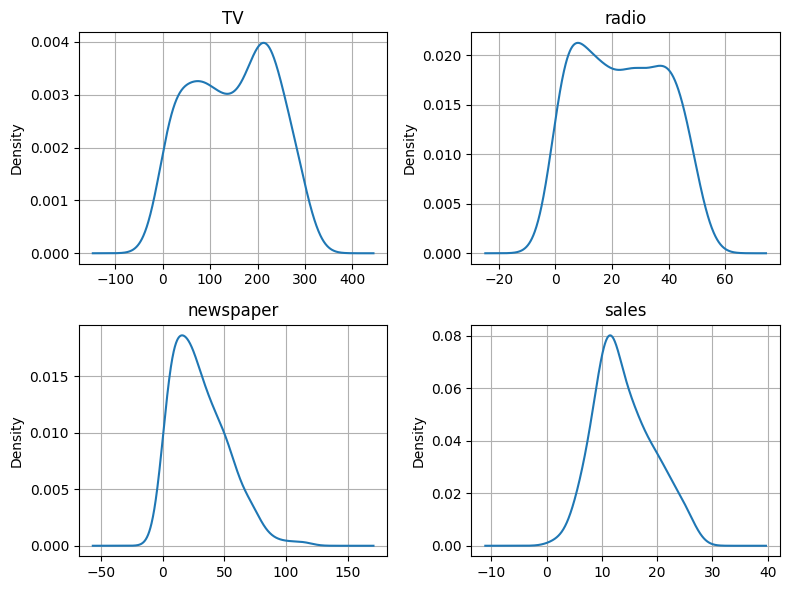

In [8]:
# KDE

plt.figure(figsize=(8, 6))
for i, column in enumerate(advertising.columns):
    plt.subplot(2, 2, i + 1)
    advertising[column].plot(kind='kde')
    plt.title(column)
    plt.grid()

plt.tight_layout()
plt.show()

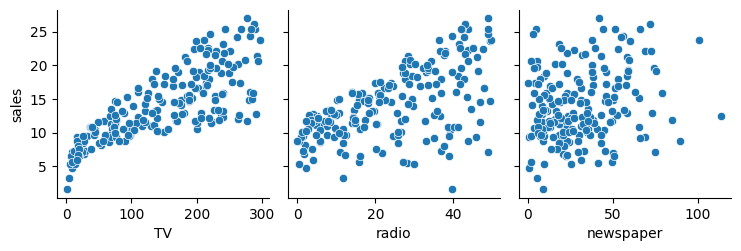

In [9]:
pairplot(advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales')

Итак, наши выводы подтверждаются графиками. Действительно, распределение затрат на рекламу в газетах скошено влево и больше походит на гамма-распределение.  
И сделаем новые выводы:
- Рост затрат на рекламу по ТВ приводит к росту продаж, но чем дальше, тем прирост менее существенный.
- Реклама по радио не так эффективна, но тем не менее приводит к росту продаж.
- Реклама в газетах неэффективна, посколько трудно выстроить чёткую зависимость между ростом затрат и ростом продаж.

Теперь построим матрицу корреляции и тепловую карту для наглядности.

<Axes: >

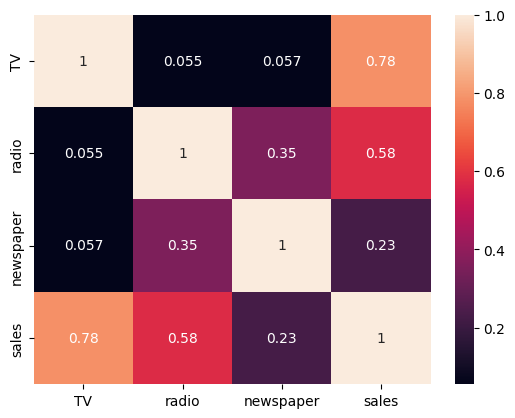

In [10]:
heatmap(advertising.corr(), annot=True)

Матрица корреляции отображена на тепловой карте. Здесь мы можем также можем сделать несколько выводов:
- Затраты на рекламу по ТВ и радио имеют высокую корреляцию с продажами, в то время как затраты на рекламу в газетах имеют низкую корреляцию.
- Чаще всего затраты на рекламу по радио и в газетах коррелируют между собой, в то время как затраты на рекламу по ТВ не имеют высокой корреляции с другими признаками.

### Работа с признаками

#### Feature extraction
Извлечём новые признаки, чтобы расширить количество уже имеющихся в датасете — очевидно, что 3 признака маловато для того, чтобы модель могла делать какие-то выводы.

Добавим признаки парных долей, где будем вычислять долю расходов на рекламу в одной из сфер в сумме расходов на рекламу пары сфер из трёх. То есть добавим столбцы `TV/(TV+radio)`, `TV/(TV+newspaper)`, `radio/(radio+TV)`, ..., `newspaper/(radio+newspaper)`.

In [15]:
columns = advertising.columns.copy()
columns = columns.drop('sales')
for column1 in columns:
    temp_columns = columns.drop(column1)
    for column2 in temp_columns:
        advertising[f'{str(column1)[0]}/({str(column1)[0]}+{str(column2)[0]})'] = advertising[column1] / (advertising[column1] + advertising[column2])

advertising.head()


,TV,radio,newspaper,sales,T/(T+r),T/(T+n),r/(r+T),r/(r+n),n/(n+T),n/(n+r)
0,230.1,37.8,69.2,22.1,0.858903,0.768794,0.141097,0.353271,0.231206,0.646729
1,44.5,39.3,45.1,10.4,0.531026,0.496652,0.468974,0.465640,0.503348,0.534360
2,17.2,45.9,69.3,9.3,0.272583,0.198844,0.727417,0.398438,0.801156,0.601562
3,151.5,41.3,58.5,18.5,0.785788,0.721429,0.214212,0.413828,0.278571,0.586172
4,180.8,10.8,58.4,12.9,0.943633,0.755853,0.056367,0.156069,0.244147,0.843931


#### Feature transformation
Для того, чтобы признаки можно было использовать в моделях машинного обучения, их необходимо нормализовать. Для этого воспользуемся методом `StandardScaler`, который стандартизирует признаки путём вычитания среднего и деления на стандартное отклонение (т.е. z-score нормализация). Сравним, как отработало наша нормализация, используя `boxplot` (т.н. ящик с усами).

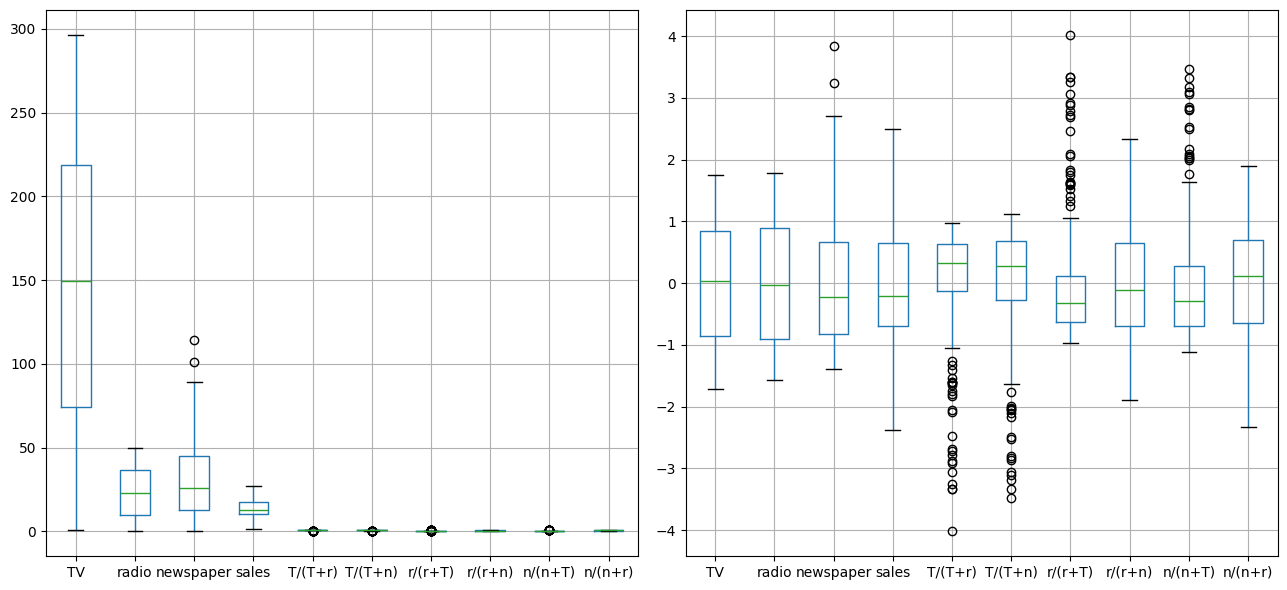

In [16]:
scaler = StandardScaler()
advertising_scaled = pd.DataFrame(scaler.fit_transform(advertising), columns=advertising.columns)

plt.figure(figsize=(13, 6))
for i, df in enumerate([advertising, advertising_scaled], 1):
    plt.subplot(1, 2, i)
    df.boxplot()
plt.tight_layout()
plt.show()

Как мы видим, теперь признаки нормализованы и приведены к единому масштабу. Но `boxplot` подсказывает нам, что в столбце `newspaper` всё ещё имеется парочка выбросов, которые нам нужно убрать. Для этого воспользуемся `IQR` и удалим строки, в которых значение `newspaper` выходит за $1.5\cdot\texttt{IQR}$.

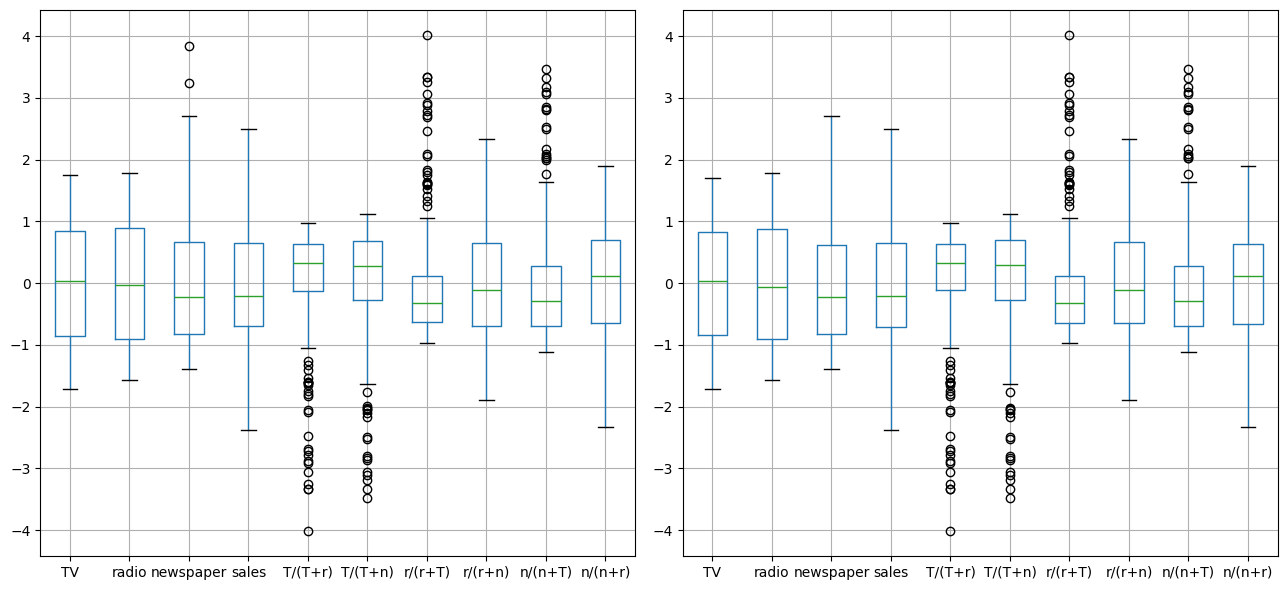

In [17]:
Q1 = advertising_scaled['newspaper'].quantile(0.25)
Q3 = advertising_scaled['newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

advertising_bounded = advertising_scaled[
    (lower_bound <= advertising_scaled['newspaper']) & (advertising_scaled['newspaper'] <= upper_bound)
]

plt.figure(figsize=(13, 6))
for i, df in enumerate([advertising_scaled, advertising_bounded], 1):
    plt.subplot(1, 2, i)
    df.boxplot()
plt.tight_layout()
plt.show()

#### Feature selection

Посмотрим на на извлечённые нами новые признаки. Во многих из них наблюдаются выбросы. Выбросы не единичны, поэтому наиболее логично будет удалить признаки с долями, в которых фигурируют расходы на рекламу по ТВ — `T(T+r)`, `T/(T+n)`, `r/(r+T)` и `n/(n+T)`. Любопытно также, что `boxplot` для оставшихся двух долей `r/(r+n)` и `n(n+r)` выглядит симметричным, относительно оси $OX$. Вероятно, между ними корреляция -1, поэтому мы можем убрать один из признаков.

In [19]:
advertising_preprocessed = advertising_bounded.drop([c for c in advertising_bounded.columns if 'T+' in c or '+T' in c] + ['r/(r+n)'], axis=1)
advertising_preprocessed.head()

,TV,radio,newspaper,sales,n/(n+r)
0,0.969852,0.981522,1.778945,1.552053,0.380988
1,-1.197376,1.082808,0.669579,-0.696046,-0.102213
2,-1.516155,1.528463,1.783549,-0.907406,0.186766
3,0.052050,1.217855,1.286405,0.860330,0.120586
4,0.394182,-0.841614,1.281802,-0.215683,1.228982


Теперь датасет готов к использованию в обучении моделей. Сохраним его, он нам пригодится.

In [20]:
advertising_preprocessed.to_csv('Advertising_preprocessed.csv', index=False)

Проведём аналогичные операции с датасетом `heart`.

## Датасет `heart`

### Первичный статистический анализ данных

Вычислим меры центральной тенденции, т.е. выборочное среднее, медиану и моду.

In [ ]:
mean_values = heart.mean()
median_values = heart.median()
mode_values = heart.mode().iloc[0]

print('Выборочное среднее:\n', mean_values)
print('\nМедиана:\n', median_values)
print('\nМода:\n', mode_values)

Выборочное среднее:
 age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

Медиана:
 age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Мода:
 age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        197.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: float64


Теперь вычислим меры разброса, т.е. дисперсию, СКО, min/max значения (в т.ч. размах) и IQR (в т.ч. квартили).

In [ ]:
variance = heart.var()
std_dev = heart.std()

min_ = heart.min()
max_ = heart.max()
min_max_ = zip(min_, max_)
range_ = max_ - min_

q1 = heart.quantile(0.25)
q3 = heart.quantile(0.75)
iqr = q3 - q1

for i, (name, value) in enumerate(
    zip(
        ['Дисперсия:', 'СКО:', 'Min/max:', 'Размах:', '1-й квартиль:', '3-й квартиль:', 'IQR:'],
        [variance, std_dev, min_max_, range_, q1, q3, iqr],
    )
):
    print('\n' * bool(i), name, sep='')
    if name == 'Min/max:':
        for col, (min_val, max_val) in zip(heart.columns, value):
            print(f'{col:<13}{min_val} / {max_val}')
        continue
    print(value)

Дисперсия:
age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

СКО:
age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

Min/max:
age          29.0 / 77.0
sex          0.0 / 1.0
cp           0.0 / 3.0
trestbps     94.0 / 200.0
chol         126.0 / 564.0
fbs          0.0 / 1.0
restecg      0.0 / 2.0
thalach      71.0 / 202.0
exang        0.0 / 1.0
oldpeak      0.0 / 6.2
slope        0.0 / 2.0
ca           0.0 / 4.0
thal       

Какие выводы можем сделать уже сейчас:
- Все столбцы заданы положительными значениями и по крайней мере 13 столбцов задаются целыми числами.
- 9 столбцов имеют фиксированный набор значений — это категориальные признаки.

In [ ]:
skew = heart.skew()
kurt = heart.kurt()

for i, (name, value) in enumerate(zip(['Асимметрия:', 'Эксцесс:'], [skew, kurt])):
    print('\n' * bool(i), name, sep='')
    print(value)

Асимметрия:
age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

Эксцесс:
age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps    0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalach    -0.061970
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.839253
thal        0.297915
target     -1.980783
dtype: float64


Теперь построим гистограммы для каждого признака, ECDF (эмпирическая функция распределения), KDE (ядерная оценка плотности) и pairplot.

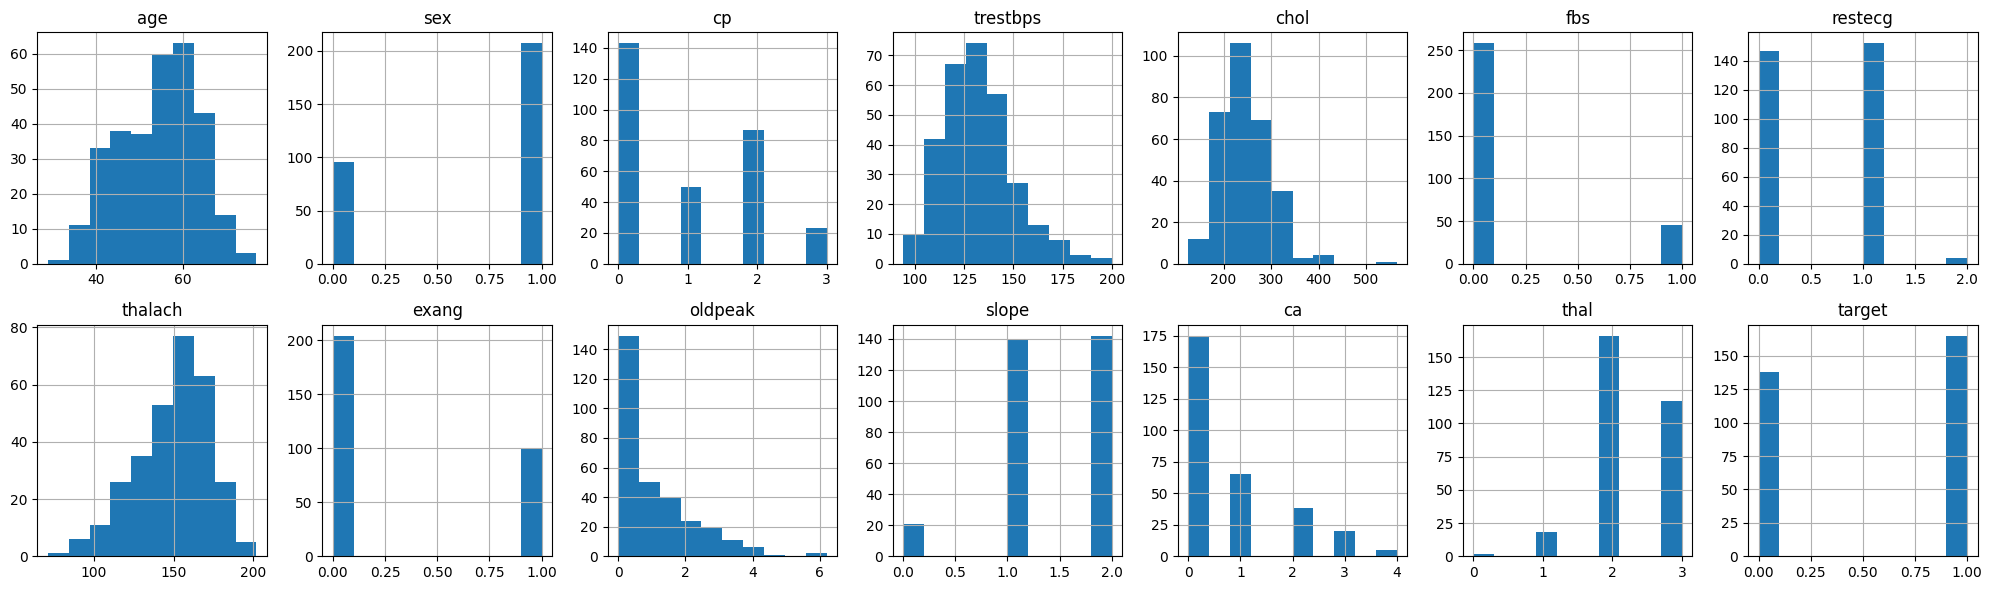

In [ ]:
# Гистограммы

num_bins = 10

plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.grid()
    plt.hist(heart.iloc[:, i], bins=num_bins)
    plt.title(heart.columns[i])

plt.tight_layout()
plt.show()

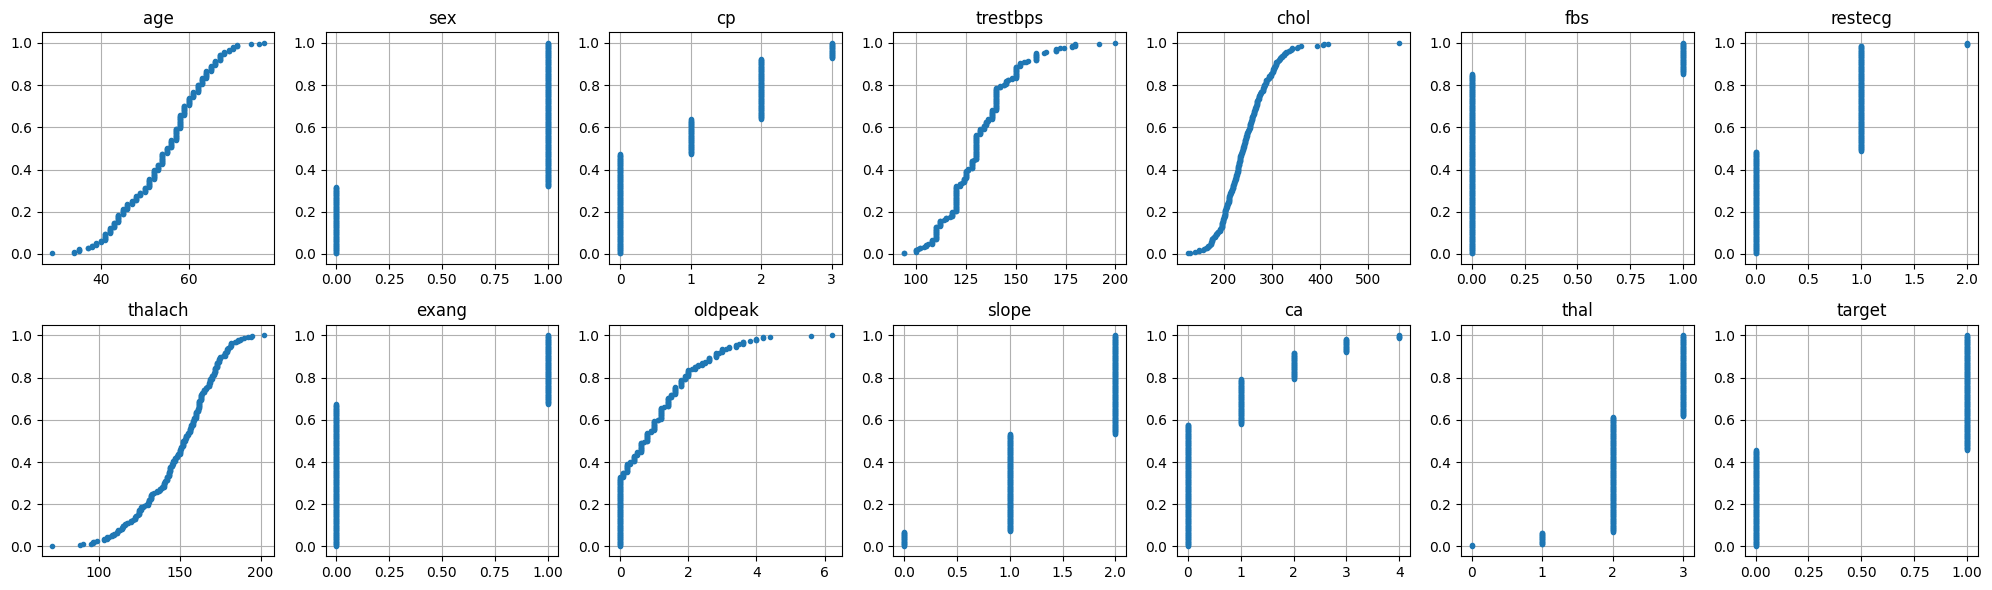

In [ ]:
# ECDF

plt.figure(figsize=(20, 6))
for i, column in enumerate(heart.columns):
    plt.subplot(2, 7, i + 1)
    ecdf = ECDF(heart[column])
    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none')
    plt.title(column)
    plt.grid()

plt.tight_layout()
plt.show()

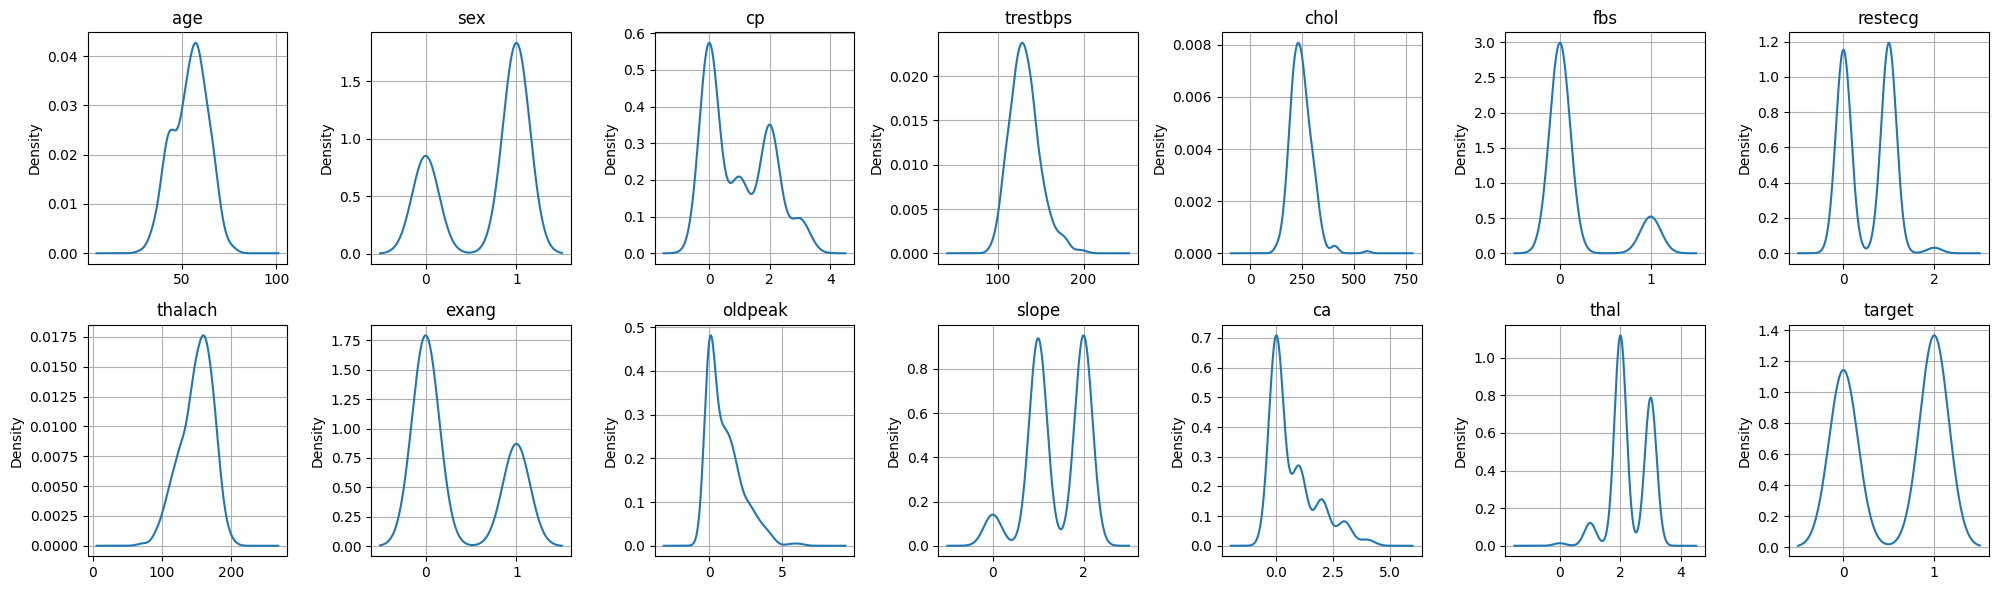

In [ ]:
# KDE

plt.figure(figsize=(20, 6))
for i, column in enumerate(heart.columns):
    plt.subplot(2, 7, i + 1)
    heart[column].plot(kind='kde')
    plt.title(column)
    plt.grid()

plt.tight_layout()
plt.show()

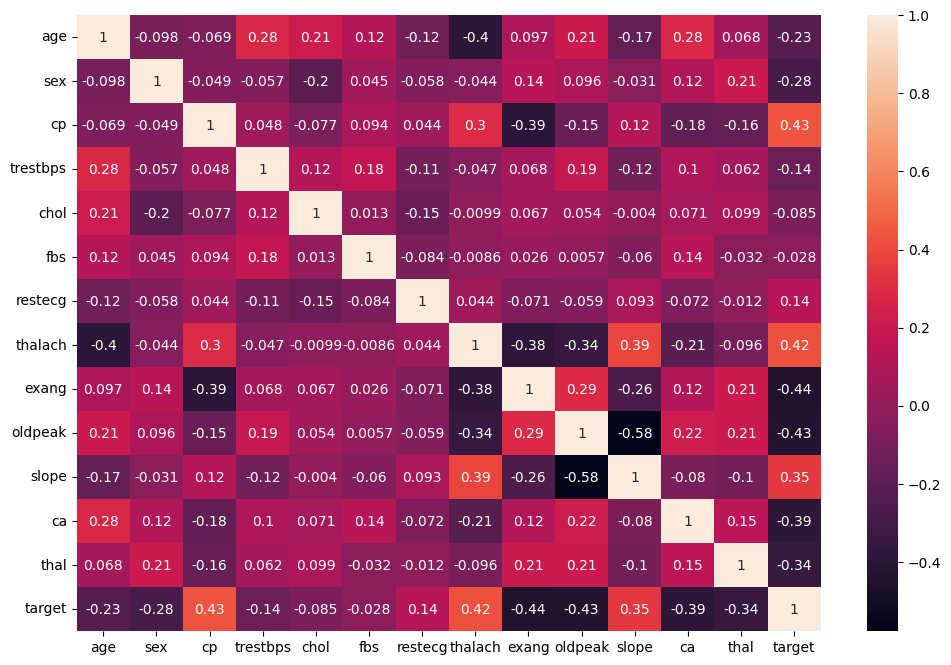

In [ ]:
plt.figure(figsize=(12, 8))
heatmap(heart.corr(), annot=True)
plt.show()

Тепловые карты помогают выделить избыточные признаки — очевидно, что если два признака имеют высокую корреляцию $(|r|\geqslant0.8)$, то мы можем избавиться от одного из них, чтобы не сбивать модель во время обучения. У нас таких нет, поэтому, когда будем работать с признаками, мы ни один не будем удалять.


### Работа с признаками

В датасете много признаков, поэтому извлекать новые, как и отбирать уже существующие в этом случае не будем.


#### Feature transformation
Говоря об  разным признакам разный подход. В нашем случае имеются следующие признаки:
- Числовые признаки: `age`, `trestbps`, `chol`, `thalach`, `oldpeak`
- Категориальные признаки (часть из которых бинарные): `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, `target`

Категориальные признаки уже представлены в удобном для обучения виде, поэтому нам остаётся только нормализовать числовые признаки. А затем удалим выбросы.

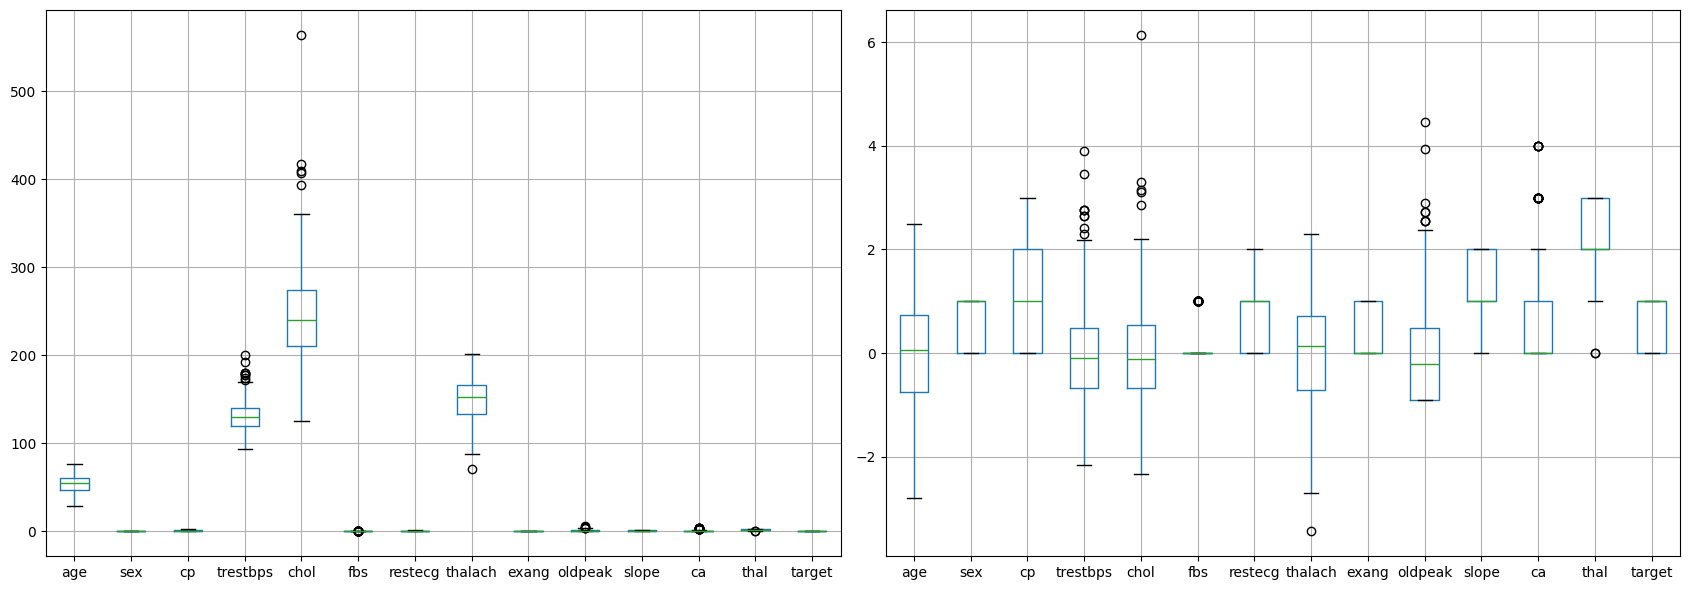

In [21]:
feauters = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
heart_scaled = heart.copy()
heart_scaled[feauters] = scaler.fit_transform(heart[feauters])

plt.figure(figsize=(17, 6))
for i, df in enumerate([heart, heart_scaled], 1):
    plt.subplot(1, 2, i)
    df.boxplot()
plt.tight_layout()
plt.show()

Как мы видим, теперь числовые признаки приведены к единому масштабу. `boxplot` вновь подсказывает нам, что в некоторых столбцах имеются выбросы. Мы не можем быть уверенными в том, что это действительно выбросы, поэтому оставим числовые признаки нетронутыми.

Понятия категориальный выброс не существует, потому как для такого типа признака задан фиксированный набор возможных значений. Но возможны случаи, когда категоиальный признак имеет значение, которое не соответствует ни одному из возможных согласно описанию датасета — такие строки также можно удалить. (Например, в датасете есть строки со значением признака `ca` равным 4 при допустимых 0-3 или `thal` равным 0 при допустимых 1-3 ${\scriptsize\text{хотя написано в доке с описанием, что 3,6,7}}$.)

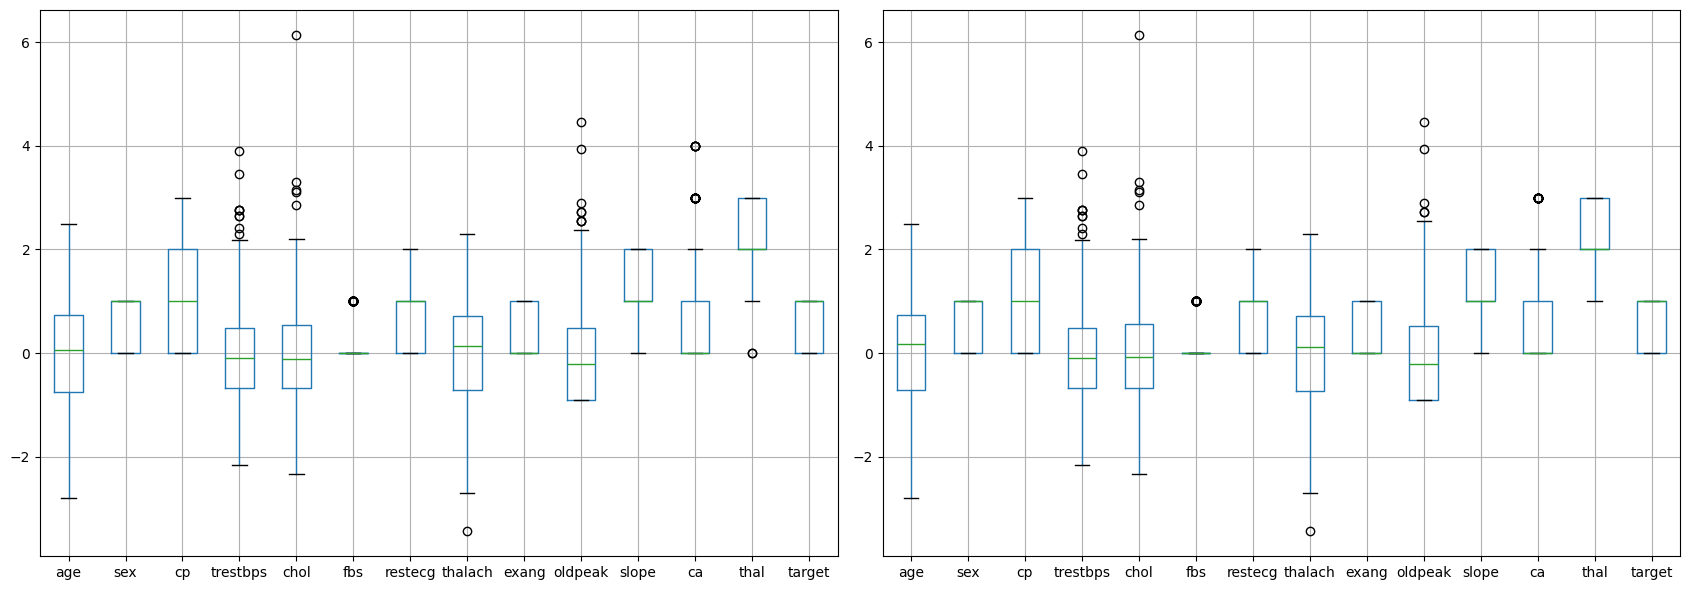

In [22]:
heart_bounded = heart_scaled.copy()
heart_bounded = heart_bounded[(heart_bounded['ca'] <= 3) & (1 <= heart_bounded['thal'])]

plt.figure(figsize=(17, 6))
for i, df in enumerate([heart_scaled, heart_bounded], 1):
    plt.subplot(1, 2, i)
    df.boxplot()
plt.tight_layout()
plt.show()

Теперь датасет готов к использованию в обучении моделей. Также сохраним его для следующих работ.

In [23]:
heart_bounded.to_csv('heart_preprocessed.csv', index=False)